In [5]:
# Importing necessary libraries
import numpy as np                 # Library for numerical computations
import pandas as pd                # Library for data manipulation and analysis
from scipy import stats            # Library for scientific and technical computing
import matplotlib.pyplot as plt    # Library for creating visualizations
import matplotlib                 # Library for customization of plots
%matplotlib inline
from matplotlib.patches import Rectangle  # Importing a specific class for drawing rectangles
import matplotlib.colors as mcolors      # Library for working with colors

import seaborn as sns              # Library based on matplotlib, for statistical data visualization
import os                           # Library for interacting with the operating system
import sys                          # Library for system-specific functionality
from chimera import Chimera         # Importing a class or module named Chimera

# Setting the style and context for Seaborn plots
sns.set(style='ticks', context='notebook', font_scale=1.2)

In [6]:
def gradient_patch(ax, xmin, xmax, ymin, ymax, fill_color='k', alpha=1, zorder=1):
    """
    Add a gradient-filled patch to the given axes.

    Parameters:
    - ax (matplotlib.axes._axes.Axes): The axes to which the patch will be added.
    - xmin, xmax, ymin, ymax (float): Define the extents of the patch.
    - fill_color (str or tuple, optional): Color of the gradient fill.
    - alpha (float, optional): Transparency of the fill.
    - zorder (int, optional): The z-order of the patch.

    Returns:
    None
    """

    # Generating x and y points for the gradient patch
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)

    # Creating a color gradient for the patch
    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    # Adding the gradient-filled patch as an image to the axes
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    # Defining the vertices of the clipping path (rectangle)
    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Rectangle(xy=(xmin, ymin), width=xmax-xmin, height=ymax-ymin, 
                          facecolor='none', edgecolor='none')
    
    # Adding the clipping path (rectangle) to the axes
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)


In [7]:
headerList = ['#', 'Area_ratio', 'num_peak', 'wl', 'FWHM', 'I400','ER']
data = pd.read_csv(r"raw.csv", names=headerList)

# Converting specified columns to numeric, handling any errors
data[headerList] = data[headerList].apply(pd.to_numeric, errors='coerce')

In [8]:
# Adding new columns to the DataFrame 'data'

# Calculating the absolute difference between the 'wl' column and the target wavelength 880
data.loc[:, 'WL_TFD'] = np.abs(data.loc[:, 'wl'] - 880)  # target is 540 +/- 2

# Calculating the absolute value of the 'Area_ratio' column and creating a new column 'AREA_TFD'
data.loc[:, 'AREA_TFD'] = np.abs(data.loc[:, 'Area_ratio'])

# Selecting all rows and columns of the DataFrame (no change in data, just resetting view)
data = data.loc[:]

# Displaying the modified DataFrame 'data' with the added columns
data

,#,Area_ratio,num_peak,wl,FWHM,I400,ER,WL_TFD,AREA_TFD
0,1,8.1100,2,866.5,187.18,0.060,2.86,13.5,8.1100
1,2,0.0000,0,0.0,800.00,0.000,0.00,880.0,0.0000
2,3,12.6600,2,920.5,191.49,0.060,4.05,40.5,12.6600
3,4,0.5600,1,538.5,151.83,0.030,1.76,341.5,0.5600
4,5,13.2400,2,911.0,204.03,0.040,3.93,31.0,13.2400
5,6,4.2100,2,812.5,153.38,0.020,1.72,67.5,4.2100
6,7,11.4300,2,875.0,189.43,0.040,3.20,5.0,11.4300
7,8,9.7600,2,807.0,164.64,0.020,2.80,73.0,9.7600
8,9,11.2800,2,853.5,174.56,0.040,2.78,26.5,11.2800
9,10,0.0000,0,0.0,800.00,0.000,0.00,880.0,0.0000


In [9]:
# Creating a Chimera instance with specified parameters
chimera = Chimera(
    tolerances=[3, 10, 0.4, 0.0],            # Tolerances for each attribute
    absolutes=[True, True, False, False],    # Whether tolerances are absolute (True) or relative (False)
    goals=['max', 'min', 'min', 'max'],      # Optimization goals for each attribute ('max' or 'min')
    softness=10e-3                          # Softness parameter for scalarization
)

# Scalarizing the data using the Chimera instance and selected attributes
scalarized = chimera.scalarize(data.loc[:, ['AREA_TFD', 'WL_TFD', 'FWHM', 'ER']])

# Retrieving the data of the row with the minimum scalarized value
data.iloc[np.argmin(scalarized), :]

#              23.000
Area_ratio     10.920
num_peak        2.000
wl            880.000
FWHM          185.140
I400            0.046
ER              3.170
WL_TFD          0.000
AREA_TFD       10.920
Name: 22, dtype: float64

In [10]:
# Creating a Chimera instance with specified parameters using different softness
chimera = Chimera(
    tolerances=[3, 10, 0.4, 0.0],            # Tolerances for each attribute
    absolutes=[True, True, False, False],    # Whether tolerances are absolute (True) or relative (False)
    goals=['max', 'min', 'min', 'max'],      # Optimization goals for each attribute ('max' or 'min')
    softness=10e-10                          # Softness parameter for scalarization
)

# Scalarizing the data using the Chimera instance and selected attributes
scalarized = chimera.scalarize(data.loc[:, ['AREA_TFD', 'WL_TFD', 'FWHM', 'ER']])

# Retrieving the data of the row with the minimum scalarized value
data.iloc[np.argmin(scalarized), :]

#              23.000
Area_ratio     10.920
num_peak        2.000
wl            880.000
FWHM          185.140
I400            0.046
ER              3.170
WL_TFD          0.000
AREA_TFD       10.920
Name: 22, dtype: float64

<AxesSubplot:ylabel='Count'>

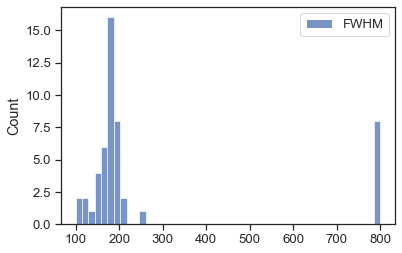

In [11]:
sns.histplot(data.loc[:, ['FWHM']]) # Creating a histogram plot using Seaborn for the 'FWHM' column of the DataFrame 'data'

## Process data to get relevant info

In [12]:
# define multi-objective preferences
chimera = Chimera(tolerances=[3, 10, 0.4, 0.0], absolutes=[True, True, False, False], goals=['max', 'min', 'min', 'max'], softness=10e-10)

# Get index of best solution at each experimental iteration
best_indices = []
for i in data.index:
    # consider objectives for experiments up to i
    objectives = data.loc[:i, ['AREA_TFD', 'WL_TFD','FWHM','ER']]
    # scalarize objectives
    scalarized = chimera.scalarize(objectives)
    # save index of best up to i
    best_idx = np.argmin(scalarized)
    best_indices.append(best_idx)
    
# get history of objectives for best solution
obj_1 = [data.loc[:, 'AREA_TFD'].to_numpy()[i] for i in best_indices]
obj_2 = [data.loc[:, 'WL_TFD'].to_numpy()[i] for i in best_indices]
obj_3 = [data.loc[:, 'FWHM'].to_numpy()[i] for i in best_indices]
obj_4 = [data.loc[:, 'ER'].to_numpy()[i] for i in best_indices]

In [18]:
# get dynamic/relative 0.4 threshoold for FWHM
min_fwhm_list = []
max_fwhm_list = []
thr_fwhm_list = []

data_clean = data.loc[(data['WL_TFD'] <= 10)]

for i in data.index:
    min_fwhm = data_clean.loc[:i, 'FWHM'].min()
    max_fwhm = data_clean.loc[:i, 'FWHM'].max()

    thr_fwhm = min_fwhm + (max_fwhm - min_fwhm) * 0.4
    min_fwhm_list.append(min_fwhm)
    max_fwhm_list.append(max_fwhm)
    thr_fwhm_list.append(thr_fwhm)

# get final/last 0.4 threshoold for FWHM
mask = (data.loc[:, 'WL_TFD']) <=10

min_fwhm = data.loc[mask, 'FWHM'].min()

max_fwhm = data.loc[mask, 'FWHM'].max()

thres_fwhm = data.loc[mask, 'FWHM'].min() + (max_fwhm - min_fwhm) * 0.4
thres_fwhm

186.892

## Three 2D plots

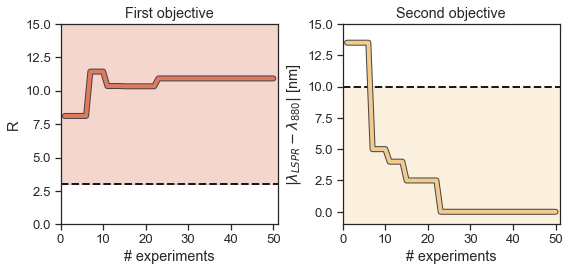

In [19]:
# Creating a figure with two subplots using Matplotlib
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

# Creating a range of experiment numbers for the x-axis
experiment_nums = range(1, len(data)+1, 1)  

# Defining colors
c1 = '#e07a5f'
c2 = '#f2cc8f'

# Plotting traces on the first subplot (ax1)
ax1.plot(experiment_nums, obj_1, color='#444444', linewidth=6)  # Light gray line as background
ax1.plot(experiment_nums, obj_1, color=c1, linewidth=4)         # Main plot line

# Plotting traces on the second subplot (ax2)
ax2.plot(experiment_nums, obj_2, color='#444444', linewidth=6)  # Light gray line as background
ax2.plot(experiment_nums, obj_2, color=c2, linewidth=4)         # Main plot line

# Filling the target region for the objectives on the first subplot
ax1.fill_between(x=range(0, len(data) + 2, 1), y1=3, y2=15, color=c1, alpha=0.3)

# Filling the target region for the objectives on the second subplot
ax2.fill_between(x=range(0, len(data) + 2, 1), y1=-1, y2=10, color=c2, alpha=0.3)

# Setting labels and titles for the subplots
for ax in [ax1, ax2]:
    ax.set_xlabel('# experiments')

ax1.set_title('First objective')
ax2.set_title('Second objective')

ax1.set_ylabel('R')
ax2.set_ylabel('$|\lambda_{LSPR} - \lambda_{880}|$ [nm]')

# Setting limits for x and y axes
ax1.set_xlim([0, 51])
ax2.set_xlim([0, 51])
ax1.set_ylim([0, 15])
ax2.set_ylim([-1, 15])

# Setting tick positions for x-axis
ticks = range(0, 51, 10)
ax1.set_xticks(ticks, minor=False)
ax2.set_xticks(ticks, minor=False)

# Adding dashed lines for tolerances on both subplots
ax1.axhline(y=chimera.tolerances[0], linestyle='--', color='k', linewidth=2, zorder=1)
ax2.axhline(y=chimera.tolerances[1], linestyle='--', color='k', linewidth=2, zorder=1)

# Adjusting layout for better visualization
plt.tight_layout()

# Displaying the figure
plt.show()

# Save the figure
# fig.savefig("objectives_plot_1_long NR.png", bbox_inches='tight', dpi=300)
#fig.savefig("objectives_plot_1.pdf", bbox_inches='tight')

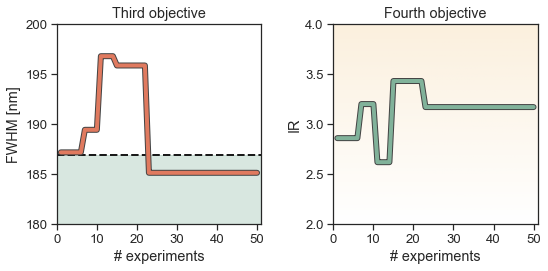

In [20]:
# Creating a figure with two subplots using Matplotlib
fig, (ax3, ax4) = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

# Creating a range of experiment numbers for the x-axis
experiment_nums = range(1, len(data)+1, 1) 

# Defining colors
c3 = '#81b29a'
c4 = '#e07a5f'

# Plotting traces on the third subplot (ax3)
ax3.plot(experiment_nums, obj_3, color='#444444', linewidth=6) # Light gray line as background
ax3.plot(experiment_nums, obj_3, color=c1, linewidth=4) # Main plot line

# Plotting traces on the fourth subplot (ax4)
ax4.plot(experiment_nums, obj_4, color='#444444', linewidth=6) # Light gray line as background
ax4.plot(experiment_nums, obj_4, color=c3, linewidth=4) # Main plot line
     
# Filling the target region for the objectives on the 3rd subplot
ax3.fill_between(x=range(-1, len(data)+2, 1), y1=0.0, y2=thres_fwhm, color=c3, alpha=0.3)  

# Filling the target region for the objectives on the 4th subplot
gradient_patch(ax=ax4, xmin=0, xmax=51, ymin=2, ymax=4, fill_color=c2, alpha=0.3)

# Setting labels and titles for the subplots
for ax in [ax3, ax4]:
    ax.set_xlabel('# experiments')
    
ax3.set_title('Third objective')
ax4.set_title('Fourth objective')

ax3.set_ylabel('FWHM [nm]')
ax4.set_ylabel('IR')

# Setting limits for x and y axes
ax3.set_xlim([0, 51])
ax4.set_xlim([0, 51])

ax3.set_ylim([180, 200])

# Setting tick positions for x-axis
ticks = range(0, 51, 10)
ax3.set_xticks(ticks, minor=False)
ax4.set_xticks(ticks, minor=False)

# Adding dashed lines for tolerances on 3rd subplot
ax3.axhline(y=thres_fwhm, linestyle='--', color='k', linewidth=2, zorder=1)

# Adjusting layout for better visualization
plt.tight_layout()

# Displaying the figure
plt.show()

# Save the figure
# # fig.savefig("objectives_plot_2.pdf", bbox_inches='tight')
# fig.savefig("objectives_plot_2_long NR.png", bbox_inches='tight', dpi=300)